In [1]:
import math
import numpy as np

from skimage import io
from skimage import data
from skimage import exposure
from scipy import ndimage


import matplotlib.pyplot as plt

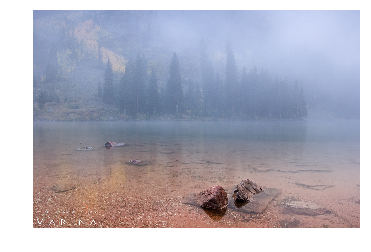

In [2]:
gambar = io.imread('./low.png')
plt.axis("off")
plt.imshow(gambar)

In [3]:
def RGB2HSI(image):
    red = np.divide(np.float32(image[:,:,0].copy()),256)
    green = np.divide(np.float32(image[:,:,1].copy()),256)
    blue = np.divide(np.float32(image[:,:,2].copy()),256)
    
    def intensity(red, green, blue):
        return np.divide(np.sum(image,axis=2), 3.0) / 256.0
    
    def saturation(red, green, blue):
        minimum = np.minimum(np.minimum(red, green), blue)
        sat = 1 - np.divide(3, (red + green + blue + 0.00001)) * minimum
        return sat
    
    def hues(red, green, blue):
        hue = np.copy(red)
        
        for i in range(0, blue.shape[0]):
            for j in range(0, blue.shape[1]):
                numerator = 0.5 * ((red[i][j] - green[i][j]) + (red[i][j] - blue[i][j]))
                denumerator = math.sqrt((red[i][j] - green[i][j])**2 + (red[i][j] - blue[i][j]) * (green[i][j] - blue[i][j]))
                # print(red[i][j], green[i][j], blue[i][j], numerator, denumerator)
                radian = math.acos(np.divide(numerator, denumerator))
                degree = np.divide((radian * np.divide(180.0,math.pi)),360.0)
                
                if blue[i][j] <= green[i][j]:
                    hue[i][j] = degree
                else:
                    hue[i][j] = (1 - degree)
        return hue
    
    hsi = np.dstack((hues(red,green,blue) , saturation(red, green, blue), intensity(red,green,blue)))
    return hsi
                

In [4]:
def HSI2RGB(image):
    red = np.float32(np.zeros_like(image[:,:,0]))
    green = np.float32(np.zeros_like(image[:,:,1]))
    blue = np.float32(np.zeros_like(image[:,:,2]))
    
    hue = np.float32(image[:,:,0].copy())
    sat = np.float32(image[:,:,1].copy())
    ins = np.float32(image[:,:,2].copy())
    
    radian60 = 60.0 * np.divide(math.pi,180.0)
    radian120 = 120.0 * np.divide(math.pi,180.0)
    radian180 = 180.0 * np.divide(math.pi,180.0)
    radian240 = 240.0 * np.divide(math.pi,180.0)
    radian300 = 300.0 * np.divide(math.pi,180.0)
    
    for i in range(0, blue.shape[0]):
        for j in range(0, blue.shape[1]):
            degree_hue = hue[i][j] * 360
            radian_hue = degree_hue * np.divide(math.pi,180.0)
            if 0 <= degree_hue and degree_hue < 120 :
                blue[i][j] = ins[i][j] * (1 - sat[i][j])
                red[i][j] = ins[i][j] * (1 + np.divide(sat[i][j] * math.cos(radian_hue) , math.cos(radian60 - radian_hue)))
                green[i][j] = 3*ins[i][j] - blue[i][j] - red[i][j]
            elif 120 <= degree_hue and degree_hue < 240 :
                red[i][j] = ins[i][j] * (1 - sat[i][j])
                green[i][j] = ins[i][j] * (1 + np.divide(sat[i][j] * math.cos(radian_hue - radian120) , math.cos(radian180 - radian_hue)))
                blue[i][j] = 3*ins[i][j] - red[i][j] - green[i][j] 
            elif 240 <= degree_hue and degree_hue <= 360 :
                green[i][j] = ins[i][j] * (1 - sat[i][j])
                blue[i][j] = ins[i][j] * (1 + np.divide(sat[i][j] * math.cos(radian_hue - radian240) , math.cos(radian300 - radian_hue)))
                red[i][j] = 3*ins[i][j] - green[i][j] - blue[i][j]
    
    rgb = (np.dstack((red, green, blue)))
    return rgb
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


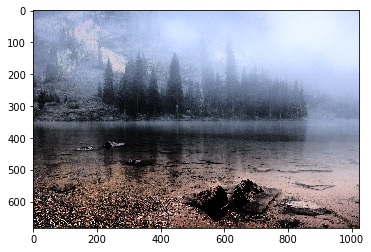

In [5]:
hsi_gambar = RGB2HSI(gambar)
hsi_gambar[:,:,2] = exposure.equalize_hist(hsi_gambar[:,:,2])
normal_gambar = HSI2RGB(hsi_gambar)

plt.imshow(normal_gambar)

In [6]:
import cv2

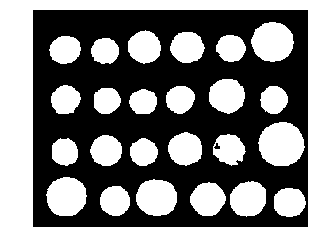

In [7]:
gambar_coin = io.imread('./test.png')
gambar_coin = cv2.cvtColor(gambar_coin, cv2.COLOR_RGB2GRAY)
_ , gambar_coin = cv2.threshold(gambar_coin,127,255,cv2.THRESH_BINARY)

plt.axis("off")
plt.imshow(gambar_coin, cmap='gray')

In [8]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
gradient = cv2.morphologyEx(gambar_coin, cv2.MORPH_GRADIENT, kernel)

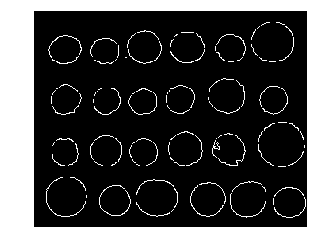

In [9]:
plt.axis("off")
plt.imshow(gradient, cmap='gray')